<a href="https://www.kaggle.com/code/nityanshukumar/model1-regression?scriptVersionId=151296707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
# print Dimesnions
print(f"Train Data: Number of Houses are: {train_data.shape[0]} and the number of features for each house are {train_data.shape[1]}")
print(f"Test Data: Number of Houses are: {test_data.shape[0]} and the number of features for each house are {test_data.shape[1]}")

Train Data: Number of Houses are: 1460 and the number of features for each house are 81
Test Data: Number of Houses are: 1459 and the number of features for each house are 80


In [4]:
# We didn't  not drop any feature at this point

# Handling naN values in numeric train (LotFrontage and GarageYrBlt) and test data
train_data = train_data.fillna(value=dict(train_data.select_dtypes(include=['int','float']).mean()))
test_data  = test_data.fillna(value=dict(train_data.select_dtypes(include=['int','float']).mean()))

# Converting naN values in object data to NA as it means amenity doesn't exit but the data does exit
train_data = train_data.fillna(value='NA')
test_data = test_data.fillna(value='NA')

In [5]:
# Ordinal Data to Numeric data for Regression 
Replacement_nums = {"LandSlope": {"Gtl": 1,"Mod": 2,"Sev": 3},                                             
                    "ExterQual": {'Po':0, 'Fa': 1, 'TA':2, 'Gd':3,  'Ex': 4},
                    "ExterCond": {'Po':0, 'Fa': 1, 'TA':2, 'Gd':3,  'Ex': 4},
                    "BsmtQual":{'NA':0 , 'Po':1, 'Fa':2, 'TA':3, 'Gd':4,  'Ex': 5},
                    "BsmtCond": {'NA':0 , 'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex': 5},
                    "BsmtExposure": {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                    "BsmtFinType1": {'NA':0,'Unf':1,'LwQ':2, 'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6},
                    "BsmtFinType2": {'NA':0,'Unf':1,'LwQ':2, 'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6},
                    "HeatingQC": {'Po':0,'Fa':1,'TA':2,'Gd':2,'Ex':3},
                    "CentralAir": {'N':0,'Y':1},
                    "KitchenQual": {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    "FireplaceQu": {'NA':0 , 'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex': 5},
                    "GarageFinish": {'NA':0 , 'Unf':1, 'RFn':2, 'Fin':3},
                    "GarageQual": {'NA':0 , 'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex': 5},
                    "GarageCond":{'NA':0 , 'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex': 5},
                    "PavedDrive": {'N':0, 'P':1,'Y':2},
                    "PoolQC": {'NA':0 , 'Fa':1, 'TA':2,'Gd':3, 'Ex': 4}
                                                   }
train_data = train_data.replace(Replacement_nums)
test_data = test_data.replace(Replacement_nums)

In [6]:
# # Selecting the columns based on Pearsson Correlation cutoff
# Corr_Train_M = train_data.select_dtypes(include=['int64','float']).corr()["SalePrice"].round(decimals=2)

# for index,name in enumerate(Corr_Train_M):
#     if abs(Corr_Train_M[index]) < 0.1:
#         print(f"Correlation less than 0.1 for {Corr_Train_M.index[index]} : {Corr_Train_M[index]}")
#         for item in list(train_data.columns):
#             if Corr_Train_M.index[index] == item:
#                 print(f"Item Delted: {item}")
#                 del train_data[Corr_Train_M.index[index]]
#                 del test_data[Corr_Train_M.index[index]]

In [7]:
# Categorical Data: One-hot Encoding list
Categorical_list1 = list(train_data.select_dtypes(include=['object']).columns)
train_data = pd.get_dummies(train_data,prefix=Categorical_list1,columns=Categorical_list1,dtype=int)
Categorical_list2 = list(test_data.select_dtypes(include=['object']).columns)
test_data = pd.get_dummies(test_data,prefix=Categorical_list2,columns=Categorical_list2,dtype=int)

In [8]:
train_X = train_data.loc[:,(train_data.columns != 'SalePrice') & (train_data.columns != 'Id')]
train_Y = train_data['SalePrice']
test_X = test_data.loc[:,test_data.columns != 'Id']

In [9]:
# Inserting the features in test data which are not present in test data
In_Train_Not_Test = []
for i in train_X.columns:
    if i not in test_X.columns:
        test_X.insert(test_X.shape[1],i,0)
        In_Train_Not_Test.append(i)

In_Test_Not_Train = []     
for i in test_X.columns:
    if i not in train_X.columns:
        In_Test_Not_Train.append(i)

# Dropping the features in test data which are not present in train data
test_X = test_X.drop(columns=In_Test_Not_Train)
# Making the column order same in feature vectors
test_X = test_X[train_X.columns]

In [10]:
print(f"Shape of train_X: {train_X.shape} and test_X: {test_X.shape}")

Shape of train_X: (1460, 239) and test_X: (1459, 239)


In [11]:
# Splitting trainning data for cross validation (model selection)
# train_X, CV_X, train_Y, CV_Y = train_test_split(train_X,train_Y,test_size=0.20,random_state=1)

#To train model on complete data
CV_X = train_X
CV_Y = train_Y

In [12]:
# Evaluating the PolynomialFeatures for Linear Regression
# The y values are passed a log2(y) as (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally) 
scalers = []
models = []
CV_error = []
for degree in range(1,3):
    poly = PolynomialFeatures(degree, include_bias=False)
    train_X_poly = poly.fit_transform(train_X)
    CV_X_poly = poly.transform(CV_X)
    
    scaler = StandardScaler()
    train_X_poly_Norm = scaler.fit_transform(train_X_poly)
    CV_X_poly_Norm = scaler.transform(CV_X_poly)
    scalers.append(scaler)
    
    sgdr = SGDRegressor(max_iter=1000,alpha=0,eta0=0.002)
    sgdr.fit( train_X_poly_Norm , np.log2(train_Y) )
    #sgdr.fit( train_X_poly_Norm , train_Y )
    print(f"Model got trained in iterations: {sgdr.n_iter_}")
    print(f"Shape of weights: {sgdr.coef_.shape} and intercept: {sgdr.intercept_}")
    models.append(sgdr)
    
    #Here we are using reLu function
    yhat_train = sgdr.predict(train_X_poly_Norm)
    #yhat_train = np.where(yhat_train >= 0,yhat_train,nan_values["SalePrice"])
    yhat_train = np.where(yhat_train >= 0,yhat_train,1)
    
    yhat_CV = sgdr.predict(CV_X_poly_Norm)
    #yhat_CV = np.where(yhat_CV >= 0,yhat_CV,nan_values["SalePrice"])
    yhat_CV = np.where(yhat_CV >= 0,yhat_CV,1)
    
    #Metric RMSE between log of predicted and observed sales price as described in House Prices - Advanced Regression Techniques Competition 
    RMSE_log2_train = math.sqrt(((np.log2(train_Y) - yhat_train)**2).sum()/len(train_Y))
    print(f"The RMSE of log2 of values on training data for degree of polynomial:{degree} is: {RMSE_log2_train}")
    RMSE_log2_CV = math.sqrt(((np.log2(CV_Y) - yhat_CV)**2).sum()/len(CV_Y))
    print(f"The RMSE of log2 of values on CV data for degree of polynomial:{degree} is: {RMSE_log2_CV}")
    CV_error.append(RMSE_log2_CV)
print(f"Degree of polynomial that should be used is: {np.argmin(CV_error)+1}")
Model_Degree = np.argmin(CV_error)+1

Model got trained in iterations: 24
Shape of weights: (239,) and intercept: [17.33072797]
The RMSE of log2 of values on training data for degree of polynomial:1 is: 0.15003623406654554
The RMSE of log2 of values on CV data for degree of polynomial:1 is: 0.15003623406654554
Model got trained in iterations: 6
Shape of weights: (28919,) and intercept: [8.10826819e+09]
The RMSE of log2 of values on training data for degree of polynomial:2 is: 2163181633027.842
The RMSE of log2 of values on CV data for degree of polynomial:2 is: 2163181633027.842
Degree of polynomial that should be used is: 1


The RMSE of log2 of values on training data for degree of polynomial:1 is: 0.15003623406654554


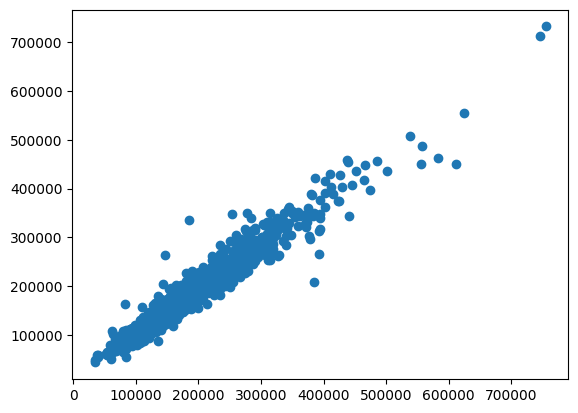

In [13]:
# Predicting values with optimum model 
poly = PolynomialFeatures(Model_Degree,include_bias=False)
train_X_poly = poly.fit_transform(train_X)
train_X_poly_Norm = scalers[Model_Degree-1].fit_transform(train_X_poly)

CV_X_poly = poly.transform(CV_X)
CV_X_poly_Norm = scalers[Model_Degree-1].transform(CV_X_poly)


yhat_train = models[Model_Degree-1].predict(train_X_poly_Norm)
yhat_train = np.where(yhat_train >= 0,yhat_train,1)
yhat_train = np.power(2,yhat_train)

yhat_CV = models[Model_Degree-1].predict(CV_X_poly_Norm)
yhat_CV = np.where(yhat_CV >= 0,yhat_CV,1)
yhat_CV = np.power(2,yhat_CV)

RMSE_log2_train = math.sqrt(((np.log2(train_Y) - np.log2(yhat_train))**2).sum()/len(train_Y))
print(f"The RMSE of log2 of values on training data for degree of polynomial:{Model_Degree} is: {RMSE_log2_train}")

plt.scatter(train_Y,yhat_train)
plt.show()

In [14]:
print(f"R2 value on train data: {r2_score(train_Y,yhat_train)}")

R2 value on train data: 0.9356732128557405


In [15]:
# Predicting Sale Price for Test set
test_X_poly = poly.transform(test_X)
test_X_poly_Norm = scalers[Model_Degree-1].transform(test_X_poly)

yhat_test = models[Model_Degree-1].predict(test_X_poly_Norm)
yhat_test = np.where(yhat_test >= 0,yhat_test,1)
yhat_test = np.power(2,yhat_test)

In [16]:
Submission_Predictions = pd.DataFrame(yhat_test,columns=['SalePrice'])
Submission_Predictions.insert(0,"Id",test_data['Id'])

In [17]:
#Submission_Predictions.to_csv('submission.csv',index=False)